# MAJOR PROJECT

In this project, we look at the contribution of different features in our dataset towards the price of a car and make an appropriate Machine Learning regression model for the same to predict car prices.

In [23]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

train = pd.read_csv('Data_Train.csv')
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [24]:
# Dataset Cleaning 

print(train.isnull().sum())
print('Size of training data set: ',train.shape)

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64
Size of training data set:  (6019, 12)


In [25]:
# We have 6019 rows of data and very small number of NA values. It's safe to drop these missing rows and it wont affect our model

pd.options.mode.chained_assignment = None 

train.dropna(how='any', inplace=True) 
train['Mileage'] = train.Mileage.str.replace('km/kg','')
train['Mileage'] = train.Mileage.str.replace('kmpl','') 
train['Engine'] = train.Engine.str.replace('CC','') 
train['Power'] = train['Power'].str.replace('bhp', '')
train['Power'] = train['Power'].str.strip() 
train = train[train['Power'] != 'null'] 

In [26]:
train['Power'] = train['Power'].astype(float) 
train['Mileage'] = train['Mileage'].astype(float) 
train['Engine'] = train['Engine'].astype(float)

train.head()
print(train.dtypes)

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object


In [27]:
print('Current Dataset size: ', train.shape)
print('Features: ', train.columns.values)

brand = []
for name in train['Name'].str.split():
    brand.append(name[0]) 
train['Brand'] = brand
train.head()

Current Dataset size:  (5872, 12)
Features:  ['Name' 'Location' 'Year' 'Kilometers_Driven' 'Fuel_Type' 'Transmission'
 'Owner_Type' 'Mileage' 'Engine' 'Power' 'Seats' 'Price']


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi


In [28]:
# LABEL ENCODING 
# We need to convert categorical features into numerical values so that our models can interpret their contribution. 

train['Fuel_Type'] = train['Fuel_Type'].astype('category') 
train['Transmission'] = train['Transmission'].astype('category') 
train['Location'] = train['Location'].astype('category') 
train['Brand'] = train['Brand'].astype('category') 
train['Owner_Type'] = train['Owner_Type'].astype('category') 

# EDA TASKS 

In this segment, we try to observe independent correlations of our attributes with price

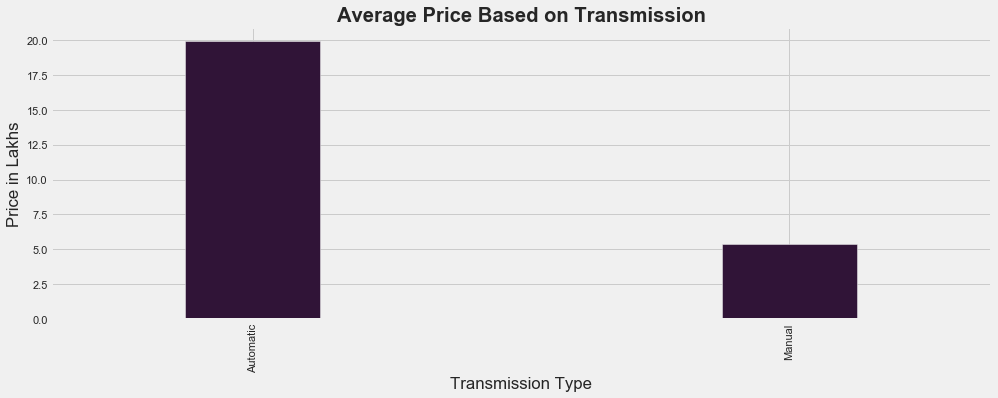

In [29]:
# Transmission vs Price

plt.style.use('fivethirtyeight')

train.groupby('Transmission')['Price'].mean().plot(kind='bar', colormap='twilight_shifted', width=0.25)
plt.title('Average Price Based on Transmission', fontweight='bold')
plt.xlabel('Transmission Type') 
plt.ylabel('Price in Lakhs') 
plt.show()

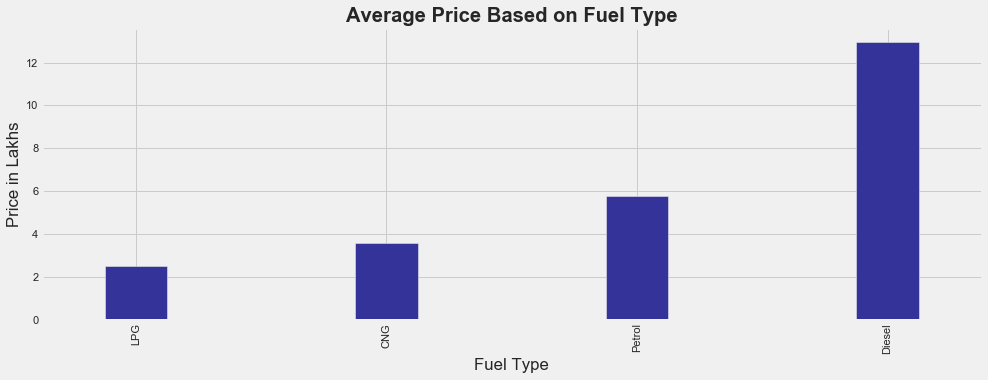

In [30]:
# Fuel Type vs Price

train.groupby('Fuel_Type')['Price'].mean().sort_values().plot(kind='bar', colormap='terrain', width=0.25)
plt.title('Average Price Based on Fuel Type', fontweight='bold')
plt.xlabel('Fuel Type') 
plt.ylabel('Price in Lakhs') 
plt.show()


We can observe here that there's an evident correlation between fuel type and price. 
**LPG<CNG<Petrol<Diesel**

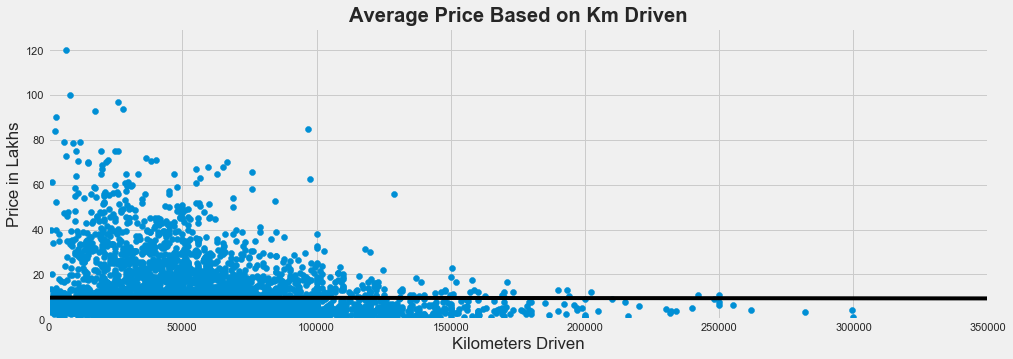

In [31]:
p = np.poly1d(np.polyfit(train['Kilometers_Driven'], train['Price'], 1)) 
xp = np.arange(0,350000)

plt.scatter(train['Kilometers_Driven'], train['Price'])
plt.plot(xp,p(xp), c='#000000' )
plt.title('Average Price Based on Km Driven', fontweight='bold')
plt.xlabel('Kilometers Driven') 
plt.ylabel('Price in Lakhs') 
plt.xlim([0,350000]) 
plt.ylim([0,130])

plt.show()

The above shown regression line isn't visualized as we expect it to. This is probably because of an outlier data point very far apart from all other data points which is messing up our regression model. Let's get rid of that.

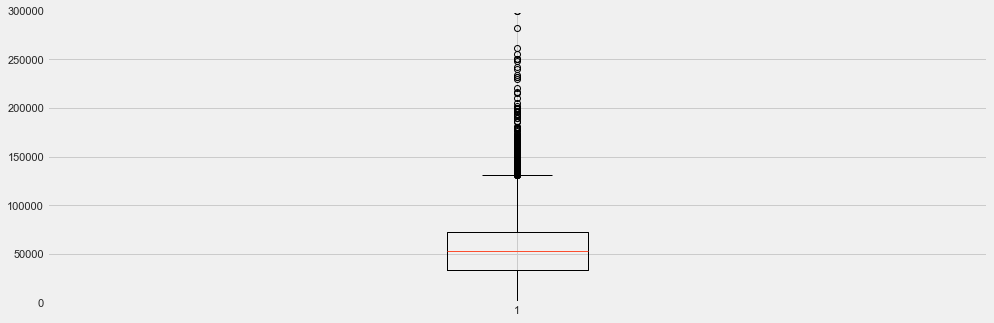

Total number of outliers:  199
Total rows of data:  5872


In [32]:
# Removing Outliers 

plt.boxplot(train['Kilometers_Driven'])
plt.ylim([0,300000])
plt.show()

q1 = np.percentile(train['Kilometers_Driven'], 25) 
q2 = np.percentile(train['Kilometers_Driven'], 50) 
q3 = np.percentile(train['Kilometers_Driven'], 75) 

iqr = q3-q1
lower_whisker = train[train['Kilometers_Driven'] <= q1-1.5*iqr]['Kilometers_Driven'].max()
upper_whisker = train[train['Kilometers_Driven'] <= q3+1.5*iqr]['Kilometers_Driven'].max()

print('Total number of outliers: ',train[train['Kilometers_Driven'] > upper_whisker]['Kilometers_Driven'].count())
print('Total rows of data: ',train.shape[0])

# Since only 199 out of 5872 rows are outliers, we can remove them without impacting our model as it's a very small fraction of our dataset

train = train[train['Kilometers_Driven'] < upper_whisker]


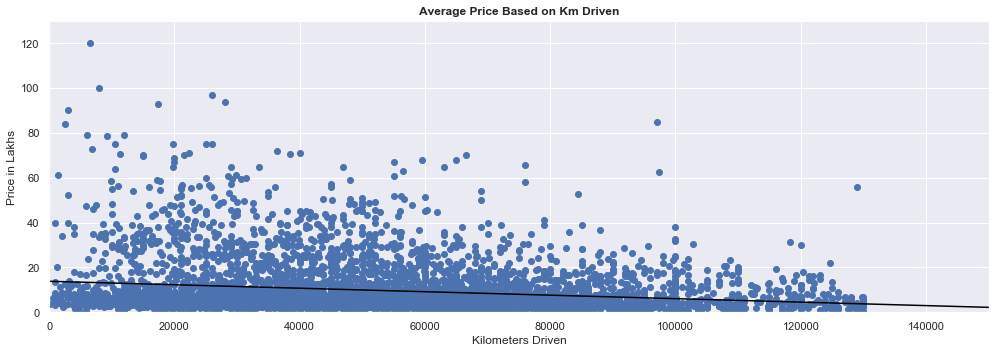

In [33]:
import seaborn as sns 
sns.set()

p = np.poly1d(np.polyfit(train['Kilometers_Driven'], train['Price'], 1)) 
xp = np.arange(0,350000)
plt.scatter(train['Kilometers_Driven'], train['Price'])
plt.plot(xp,p(xp), c='#000000' )
plt.title('Average Price Based on Km Driven', fontweight='bold')
plt.xlabel('Kilometers Driven') 
plt.ylabel('Price in Lakhs') 
plt.xlim([0,150000]) 
plt.ylim([0,130])
plt.show()

We can see a very small trend here wherein Km increase leads to price decrease. Not a big contributor though!

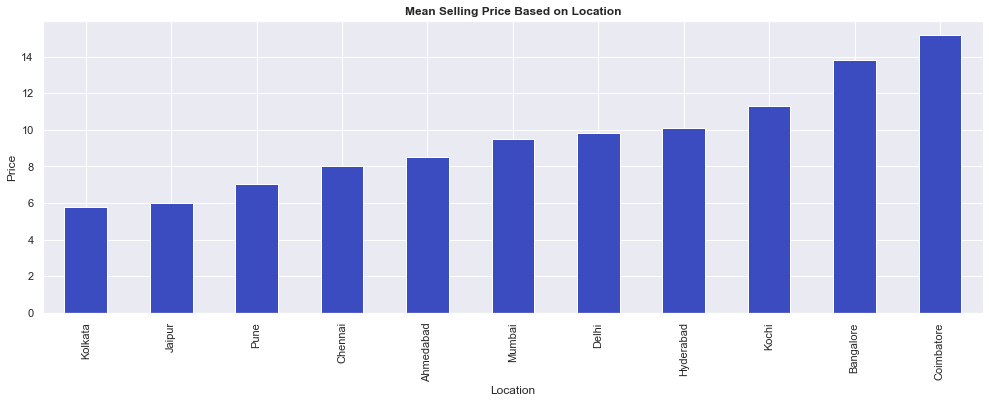

In [34]:
# Location vs Price 

train.groupby('Location')['Price'].mean().sort_values().plot(kind='bar', colormap='coolwarm') 
plt.ylabel('Price') 
plt.title('Mean Selling Price Based on Location', fontweight = 'bold')
plt.show()

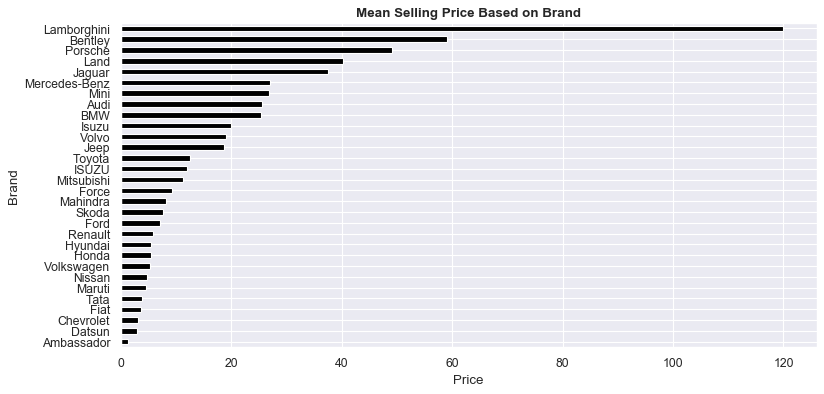

In [35]:
# Brand vs Price

plt.figure(figsize=(10,5),dpi=80)

train.groupby('Brand')['Price'].mean().sort_values().plot(kind='barh', colormap='gist_gray') 
plt.xlabel('Price') 
plt.title('Mean Selling Price Based on Brand', fontweight = 'bold')
plt.show()

Lamborghini is leading the price charts significantly, followed by Bentley and Porsche

[Text(0, 0, 'Ambassador'),
 Text(0, 0, 'Audi'),
 Text(0, 0, 'BMW'),
 Text(0, 0, 'Bentley'),
 Text(0, 0, 'Chevrolet'),
 Text(0, 0, 'Datsun'),
 Text(0, 0, 'Fiat'),
 Text(0, 0, 'Force'),
 Text(0, 0, 'Ford'),
 Text(0, 0, 'Honda'),
 Text(0, 0, 'Hyundai'),
 Text(0, 0, 'ISUZU'),
 Text(0, 0, 'Isuzu'),
 Text(0, 0, 'Jaguar'),
 Text(0, 0, 'Jeep'),
 Text(0, 0, 'Lamborghini'),
 Text(0, 0, 'Land'),
 Text(0, 0, 'Mahindra'),
 Text(0, 0, 'Maruti'),
 Text(0, 0, 'Mercedes-Benz'),
 Text(0, 0, 'Mini'),
 Text(0, 0, 'Mitsubishi'),
 Text(0, 0, 'Nissan'),
 Text(0, 0, 'Porsche'),
 Text(0, 0, 'Renault'),
 Text(0, 0, 'Skoda'),
 Text(0, 0, 'Tata'),
 Text(0, 0, 'Toyota'),
 Text(0, 0, 'Volkswagen'),
 Text(0, 0, 'Volvo')]

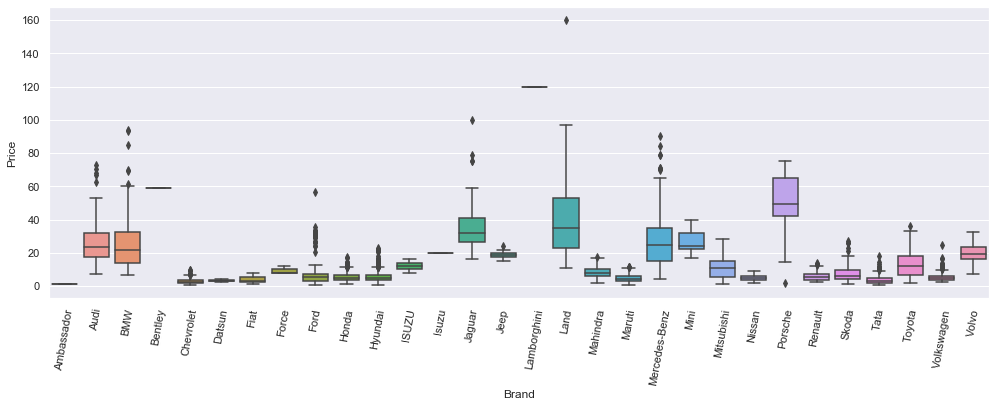

In [36]:
# Outliers in Brands' Prices

sns.set(rc={'figure.figsize':(15,5)})
ax=sns.boxplot(x='Brand', y='Price', data=train)
ax.set_xticklabels(ax.get_xticklabels(),rotation=80)

From the above graph we can see that most of the companies work in a certain price range and thus have their upper and lower whisker very close to each other. There are exceptions like Mercedes which has a bigger price range in it's cars which means it sells both high end and average priced cars. 

Companies like Lamborghini are not even visible in this graph because the prices of it is so high that only its lower whisker is visible in the graph!

In [37]:
train[train['Engine'] > 3000]['Brand'].value_counts()

# Since outliers are representative of a brand, maybe we should not get rid of it? 

Ford             16
Mercedes-Benz    15
Audi              7
Porsche           5
Land              5
BMW               3
Skoda             2
Jaguar            2
Bentley           1
Lamborghini       1
Volvo             0
Honda             0
Fiat              0
Force             0
ISUZU             0
Datsun            0
Chevrolet         0
Hyundai           0
Jeep              0
Isuzu             0
Volkswagen        0
Mahindra          0
Maruti            0
Mini              0
Mitsubishi        0
Nissan            0
Renault           0
Tata              0
Toyota            0
Ambassador        0
Name: Brand, dtype: int64

In [38]:
def remove_outliers(feature, df):
    q1 = np.percentile(df[feature], 25) 
    q2 = np.percentile(df[feature], 50) 
    q3 = np.percentile(df[feature], 75) 

    iqr = q3-q1    
    lower_whisker = df[df[feature] >= q1-1.5*iqr][feature].min()
    upper_whisker = df[df[feature] <= q3+1.5*iqr][feature].max()
    
    if(display_outliers(feature, df, upper_whisker, lower_whisker )):
        return  df[(df[feature] < upper_whisker) & (df[feature]>lower_whisker)] 
    else:
        return df

def display_outliers(feature, df, upper_whisker, lower_whisker):
    print(df[(df[feature] > upper_whisker) | (df[feature]<lower_whisker)]['Brand'].value_counts())
    choice = input('Do you want to remove outliers? ') 
    if(choice.upper() == 'Y'):
        return True 
    else:
        return False
    

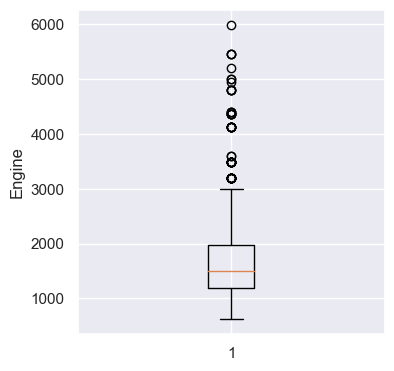

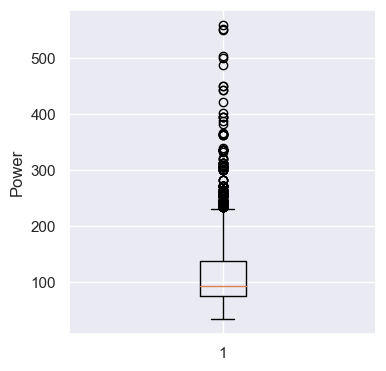

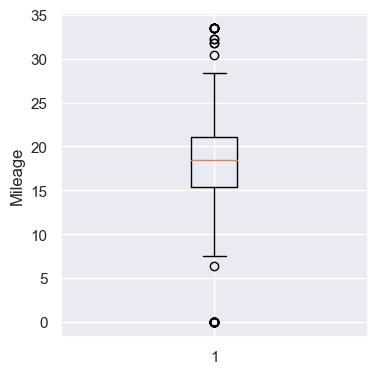

In [39]:
# Visualizing Outliers 

# ----ENGINE----

plt.figure(figsize=(12,4), dpi = 100) 

plt.subplot(1,3,1) 
plt.boxplot(train['Engine']) 
plt.ylabel('Engine') 

# ----POWER----

plt.figure(figsize=(12,4), dpi = 100) 

plt.subplot(1,3,2) 
plt.boxplot(train['Power']) 
plt.ylabel('Power') 

# ----Mileage----

plt.figure(figsize=(12,4), dpi = 100) 

plt.subplot(1,3,3) 
plt.boxplot(train['Mileage']) 
plt.ylabel('Mileage') 
plt.show()


Ford             16
Mercedes-Benz    15
Audi              7
Porsche           5
Land              5
BMW               3
Skoda             2
Jaguar            2
Bentley           1
Lamborghini       1
Volvo             0
Honda             0
Fiat              0
Force             0
ISUZU             0
Datsun            0
Chevrolet         0
Hyundai           0
Jeep              0
Isuzu             0
Volkswagen        0
Mahindra          0
Maruti            0
Mini              0
Mitsubishi        0
Nissan            0
Renault           0
Tata              0
Toyota            0
Ambassador        0
Name: Brand, dtype: int64
Do you want to remove outliers? y
BMW              70
Audi             54
Mercedes-Benz    33
Jaguar           18
Porsche          11
Land              7
ISUZU             0
Hyundai           0
Honda             0
Ford              0
Volvo             0
Force             0
Isuzu             0
Datsun            0
Chevrolet         0
Bentley           0
Fiat              0


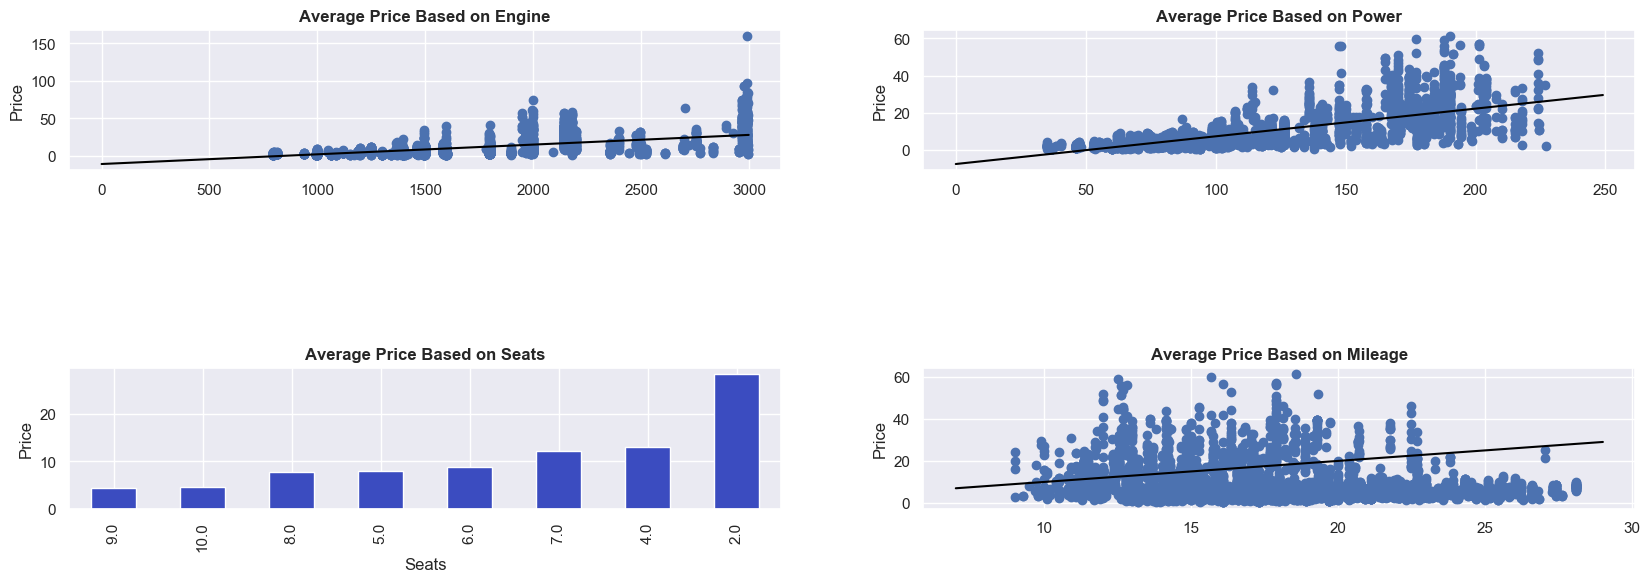

In [40]:
plt.figure(figsize=(18,8), dpi=100) 

# ---------ENGINE --------------

train = remove_outliers('Engine', train)

plt.subplot(4,2,1) 
p = np.poly1d(np.polyfit(train['Engine'], train['Price'], 1)) 
xp = np.arange(0,3000)

plt.scatter(train['Engine'], train['Price'])
plt.plot(xp,p(xp), c='#000000' )
plt.title('Average Price Based on Engine', fontweight='bold')
plt.ylabel('Price')

# ---------Power --------------

plt.subplot(4,2,2) 

train = remove_outliers('Power',train)
# print(train.head())
p = np.poly1d(np.polyfit(train['Power'], train['Price'], 1)) 
xp = np.arange(0,250)

plt.scatter(train['Power'], train['Price'])
plt.plot(xp,p(xp), c='#000000' )
plt.title('Average Price Based on Power', fontweight='bold')
plt.ylabel('Price')

# ---------Seats --------------

plt.subplot(4,2,5)
train.groupby('Seats')['Price'].mean().sort_values().plot(kind='bar', colormap='coolwarm')
plt.title('Average Price Based on Seats', fontweight='bold')
plt.ylabel('Price')

# ---------Mileage--------------

plt.subplot(4,2,6) 

train = remove_outliers('Mileage', train)

p = np.poly1d(np.polyfit(train['Mileage'], train['Mileage'], 1)) 
xp = np.arange(7,30)

plt.scatter(train['Mileage'], train['Price'])
plt.plot(xp,p(xp), c='#000000' )
plt.title('Average Price Based on Mileage', fontweight='bold')
plt.ylabel('Price')
plt.show()
